In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from apyori import apriori
import sklearn
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn import metrics
import warnings
import pylab
import calendar
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [149]:
train_df=pd.read_csv(r'/Users/sushilsunilkumardeshmukh/university_summer_2021/project/bike_sharing_project/bike-sharing-demand/train.csv')
test_df_1=pd.read_csv(r'/Users/sushilsunilkumardeshmukh/university_summer_2021/project/bike_sharing_project/bike-sharing-demand/test.csv')
df=train_df.copy()
test_df=test_df_1.copy()
df.head()
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [150]:
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [151]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [152]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

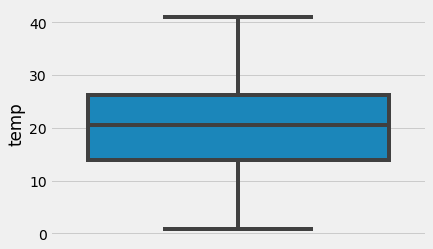

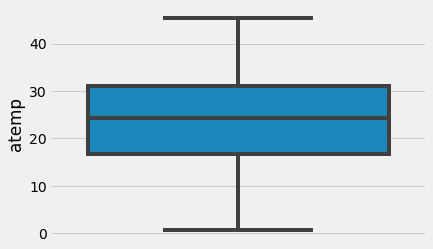

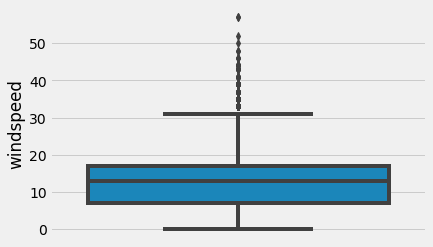

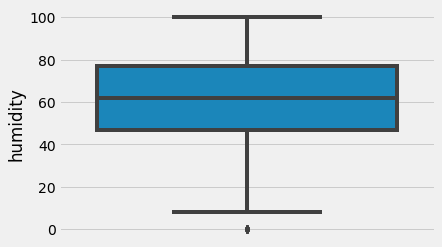

In [153]:
outlier_plot_1=sns.boxplot(data=df,y='temp')
plt.show()
outlier_plot_2=sns.boxplot(data=df,y='atemp')
plt.show()
outlier_plot_3=sns.boxplot(data=df,y='windspeed')
plt.show()
outlier_plot_4=sns.boxplot(data=df,y='humidity')
plt.show()

In [154]:
print(df.shape)
df=df.drop(df[df['humidity']<10].index)
df=df.drop(df[df['windspeed']>30].index)
print(df.shape)


(10886, 12)
(10437, 12)


In [155]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()
test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.datetime)]
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.datetime)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = test_df['year'].map({2011:0, 2012:1})
test_df.head()
df.drop('datetime',axis=1,inplace=True)
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


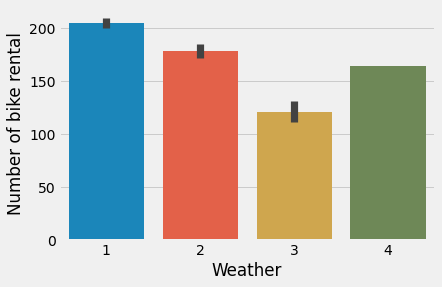

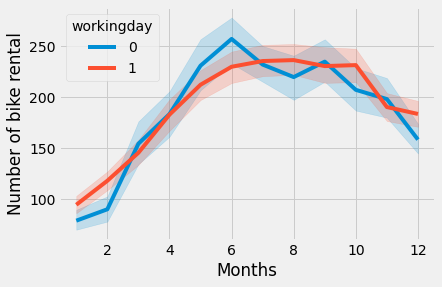

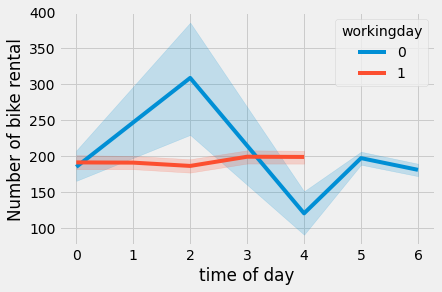

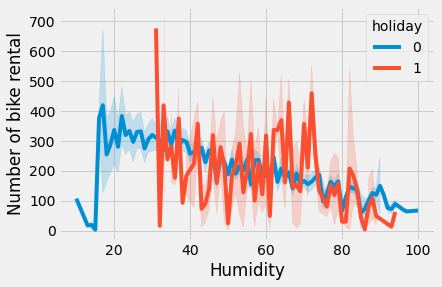

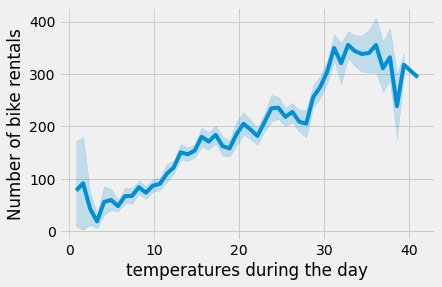

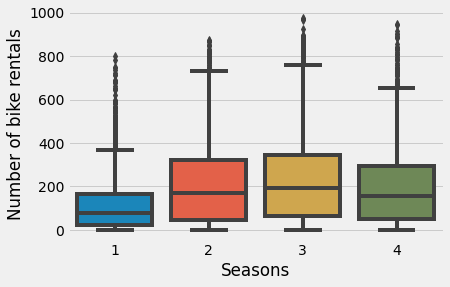

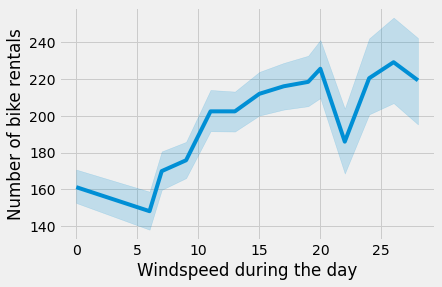

In [156]:
sample_plot=sns.barplot(x=df['weather'],y=df['count'])
plt.ylabel('Number of bike rental')
plt.xlabel('Weather')
plt.show()

sample_plot_2=sns.lineplot(x=df['month'],y=df['count'],hue=df['workingday'])
plt.ylabel('Number of bike rental')
plt.xlabel('Months')
plt.show()

sample_plot_3=sns.lineplot(x=df['day'],y=df['count'],hue=df['workingday'])
plt.ylabel('Number of bike rental')
plt.xlabel('time of day')
plt.show()
plot_4=sns.lineplot(x=df['humidity'],y=df['count'],hue=df['holiday'])
plt.ylabel('Number of bike rental')
plt.xlabel('Humidity')
plt.show()

plot_5=sns.lineplot(x=df['temp'],y=df['count'])
plt.ylabel('Number of bike rentals')
plt.xlabel('temperatures during the day')
plt.show()
plot_6=sns.boxplot(x=df['season'],y=df['count'])
plt.ylabel('Number of bike rentals')
plt.xlabel('Seasons')
plt.show()
plot_7=sns.lineplot(x=df['windspeed'],y=df['count'])
plt.ylabel('Number of bike rentals')
plt.xlabel('Windspeed during the day')
plt.show()

In [157]:
seasons=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,seasons],axis=1)
df.head()
seasons=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,seasons],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,0,1,0,0,0


In [158]:
weather_col=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather_col],axis=1)
df.head()
weather_col=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather_col],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,...,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,...,1,0,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,...,1,0,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,...,1,0,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,...,1,0,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,...,1,0,1,0,0,0,1,0,0,0


In [159]:
df.drop(['season','weather'],inplace=True,axis=1)
df.head()
test_df.drop(['season','weather'],inplace=True,axis=1)
test_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,hour,day,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,0,3,1,0,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,3,1,0,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,2,3,1,0,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,3,3,1,0,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,4,3,1,0,1,0,0,0,1,0,0,0


<AxesSubplot:>

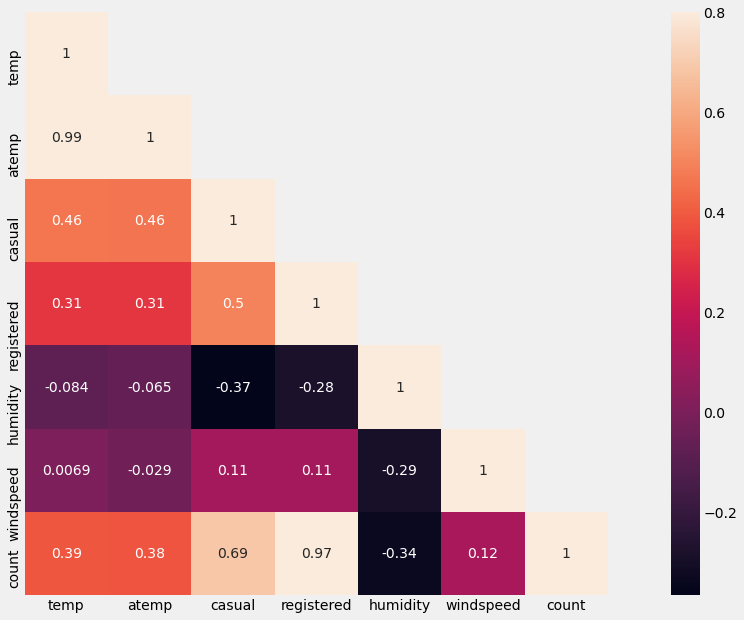

In [160]:
corrMatt = df[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [161]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [162]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,day,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,16,0,5,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,40,1,5,1,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,32,2,5,1,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,13,3,5,1,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,1,4,5,1,0,1,0,0,0,1,0,0,0


/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


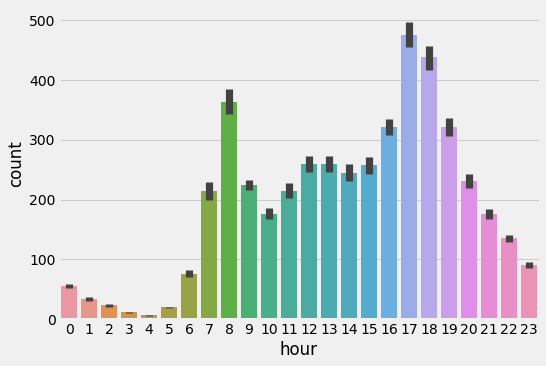

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


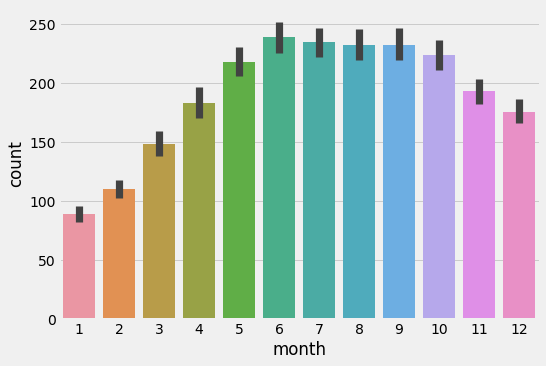

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


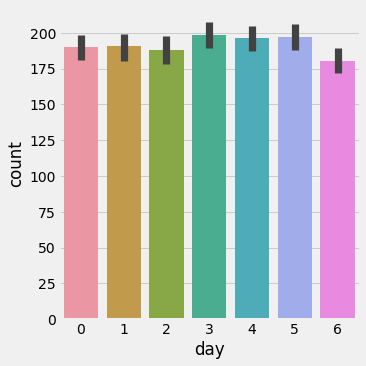

In [163]:
refined_plot1=sns.factorplot(x="hour",y="count",data=df,kind='bar',size=5,aspect=1.5)
plt.show()
refined_plot2=sns.factorplot(x="month",y="count",data=df,kind='bar',size=5,aspect=1.5)
plt.show()
refined_plot3=sns.factorplot(x="day",y='count',kind='bar',data=df,size=5,aspect=1)
plt.show()

# separating the categorical and numerical columns and starting 

In [164]:
df.columns.to_series().groupby(df.dtypes).groups

{uint8: ['season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'], int64: ['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month', 'year'], float64: ['temp', 'atemp', 'windspeed']}

In [165]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

In [166]:
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=sklearn.ensemble.RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)


In [167]:
print((np.sqrt(mean_squared_log_error(pred,y_test))))
print(sklearn.metrics.r2_score(pred,y_test))

0.32455765099582873
0.9421824113501936


In [168]:
pred=clf_rf.predict(test_df.drop('datetime',axis=1))
dict_data={'datetime':test['datetime'],'count':pred}
ans=pd.DataFrame(dict_data)
ans.to_csv('answer.csv',index=False) 

In [169]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# FINDING THE NUMBER OF CLUSTERS FOR K-MEANS CLUSTERING USING THE ELBOW METHOD

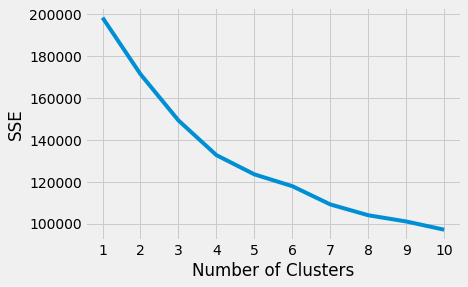

In [170]:
kmeans_kwargs = {
"init": "random",
 "n_init": 10,
"max_iter": 300,
"random_state": 42,}


sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


# K-MEANS CLUSTERING FOR UNSUPERVISED LEARNING

In [171]:
x = df.iloc[:,:]
x
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [172]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

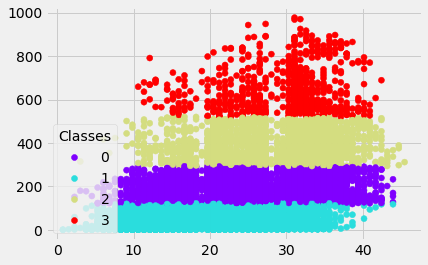

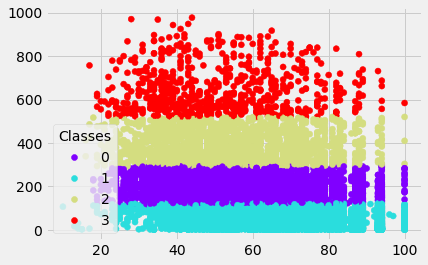

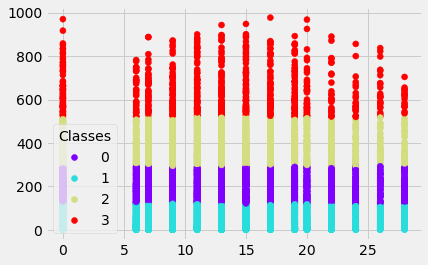

In [173]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
scatter1=plt.scatter(data_with_clusters['atemp'],data_with_clusters['count'],c=data_with_clusters['Clusters'],cmap='rainbow')
legend1 = plt.legend(*scatter1.legend_elements(),
                    loc="lower left", title="Classes")
plt.show()
scatter2=plt.scatter(data_with_clusters['humidity'],data_with_clusters['count'],c=data_with_clusters['Clusters'],cmap='rainbow')
legend2 = plt.legend(*scatter1.legend_elements(),
                    loc="lower left", title="Classes")
plt.show()
scatter3=plt.scatter(data_with_clusters['windspeed'],data_with_clusters['count'],c=data_with_clusters['Clusters'],cmap='rainbow')
legend3 = plt.legend(*scatter1.legend_elements(),
                    loc="lower left", title="Classes")
plt.show()

In [174]:
score = silhouette_score(df, kmeans.labels_, metric='euclidean')
print(score)

0.5331677132846561
